# CLASSIFICATION

**Data Description**: 

**Domain**: 

**Context**: 

**Attribute Information**
* 1. **`number`**: incident identifier (24,918 different values)
* 2. **`incident state`**: eight levels controlling the incident management process transitions from opening until closing the case;
* 3.  **`active`**: boolean attribute that shows whether the record is active or closed/canceled;
* 4.  **`reassignment_count`**: number of times the incident has the group or the support analysts changed;
* 5.  **`reopen_count`**: number of times the incident resolution was rejected by the caller;
* 6.  **`sys_mod_count`**: number of incident updates until that moment;
* 7.  **`made_sla`**: boolean attribute that shows whether the incident exceeded the target SLA;
* 8.  **`caller_id`**: identifier of the user affected;
* 9.  **`opened_by`**: identifier of the user who reported the incident;
* 10. **`opened_at`**: incident user opening date and time;
* 11. **`sys_created_by`**: identifier of the user who registered the incident;
* 12. **`sys_created_at`**: incident system creation date and time;
* 13. **`sys_updated_by`**: identifier of the user who updated the incident and generated the current log record;
* 14. **`sys_updated_at`**: incident system update date and time;
* 15. **`contact_type`**: categorical attribute that shows by what means the incident was reported;
* 16. **`location`**: identifier of the location of the place affected;
* 17. **`category`**: first-level description of the affected service;
* 18. **`subcategory`**: second-level description of the affected service (related to the first level description, i.e., to category);
* 19. **`u_symptom`**: description of the user perception about service availability;
* 20. **`cmdb_ci`**: (confirmation item) identifier used to report the affected item (not mandatory);
* 21. **`impact`**: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
* 22. **`urgency`**: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
* 23. **`priority`**: calculated by the system based on 'impact' and 'urgency';
* 24. **`assignment_group`**: identifier of the support group in charge of the incident;
* 25. **`assigned_to`**: identifier of the user in charge of the incident;
* 26. **`knowledge`**: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
* 27. **`u_priority_confirmation`**: boolean attribute that shows whether the priority field has been double-checked;
* 28. **`notify`**: categorical attribute that shows whether notifications were generated for the incident;
* 29. **`problem_id`**: identifier of the problem associated with the incident;
* 30. **`rfc`**: (request for change) identifier of the change request associated with the incident;
* 31. **`vendor`**: identifier of the vendor in charge of the incident;
* 32. **`caused_by`**: identifier of the RFC responsible by the incident;
* 33. **`close_code`**: identifier of the resolution of the incident;
* 34. **`resolved_by`**: identifier of the user who resolved the incident;
* 35. **`resolved_at`**: incident user resolution date and time (dependent variable);
* 36. **`closed_at`**: incident user close date and time (dependent variable).

**Learning Outcomes**
* 
* 
* 
* 

### INSTALLING NECCESSARY PACKAGES FOR THIS PROJECT

In [1]:
!pip install -U imbalanced-learn

# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

np.random.seed(0)

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# Oversampling
from imblearn.over_sampling import SMOTE

# Seaborn 
import seaborn as sns

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

## Task 1: Retrieving and Preparing the Data

In [2]:
# Reading the data as a dataframe and print the first five rows
incident_data = pd.read_csv('incident_event_log.csv')
incident_data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


#### Observation 1 - Checking for missing values, including '?' and replacing them
Checking for missing values represented as '?' and replacing them

In [3]:
# Replace all missing values with 'unknown information' across the dataset
incident_data.fillna('unknown information', inplace=True)

In [4]:
# Replace '?' with 'unknown information' for missing values
incident_data.replace({'?': 'unknown information'}, inplace=True)

In [5]:
# Verify the replacement by checking for missing values again
missing_values_after_replacement = incident_data.isna().sum()
missing_values_after_replacement

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

#### Observation 2 - Removing white spaces from string columns

In [6]:
# Removing white spaces from string columns
string_columns = incident_data.select_dtypes(include='object').columns
incident_data[string_columns] = incident_data[string_columns].applymap(lambda x: x.strip() if isinstance(x, str) else x)

#### Observation 3 - Converting date columns to datetime format

In [7]:
# Converting date columns to datetime format
datetime_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
incident_data[datetime_columns] = incident_data[datetime_columns].apply(pd.to_datetime, errors='coerce')
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  object        
 1   incident_state           141712 non-null  object        
 2   active                   141712 non-null  bool          
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  bool          
 7   caller_id                141712 non-null  object        
 8   opened_by                141712 non-null  object        
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  object        
 11  sys_created_at           88636 non-null   datetime64[ns]
 12  sys_updated_by  

#### Observation 4 - Standardizing text data

In [8]:
# Standardising text data
text_columns = incident_data.select_dtypes(include='object').columns
incident_data[text_columns] = incident_data[text_columns].apply(lambda x: x.str.lower())

#### Observation 5 - Feature engineering for incident duration (Preparation for Task 2: Feature Engineering)

In [9]:
# Feature engineering for incident duration
incident_data['duration_hours'] = (incident_data['closed_at'] - incident_data['opened_at']).dt.total_seconds() / 3600
incident_data['duration_hours'].fillna(incident_data['duration_hours'].median(), inplace=True)
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  object        
 1   incident_state           141712 non-null  object        
 2   active                   141712 non-null  bool          
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  bool          
 7   caller_id                141712 non-null  object        
 8   opened_by                141712 non-null  object        
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  object        
 11  sys_created_at           88636 non-null   datetime64[ns]
 12  sys_updated_by  

#### Observation 6 - Conducting Exploratory Data Analysis (EDA)

In [10]:
print("Descriptive Statistics for Numerical Columns:")
print(incident_data.describe())

Descriptive Statistics for Numerical Columns:
       reassignment_count   reopen_count  sys_mod_count   
count       141712.000000  141712.000000  141712.000000  \
mean             1.104197       0.021918       5.080946   
min              0.000000       0.000000       0.000000   
25%              0.000000       0.000000       1.000000   
50%              1.000000       0.000000       3.000000   
75%              1.000000       0.000000       6.000000   
max             27.000000       8.000000     129.000000   
std              1.734673       0.207302       7.680652   

                           opened_at                 sys_created_at   
count                         141712                          88636  \
mean   2016-04-12 22:19:09.100852736  2016-04-08 16:21:18.906539008   
min              2016-02-29 01:16:00            2016-02-29 01:23:00   
25%              2016-03-16 15:24:00            2016-03-14 16:13:00   
50%              2016-04-07 16:27:00            2016-04-01 20:08:00

#### Observation 7 - Data normalisation/standardisation

In [11]:
# Data normalization/standardization
incident_data['duration_hours'] = (incident_data['duration_hours'] - incident_data['duration_hours'].mean()) / incident_data['duration_hours'].std()
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  object        
 1   incident_state           141712 non-null  object        
 2   active                   141712 non-null  bool          
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  bool          
 7   caller_id                141712 non-null  object        
 8   opened_by                141712 non-null  object        
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  object        
 11  sys_created_at           88636 non-null   datetime64[ns]
 12  sys_updated_by  

In [12]:
# Print the preprocessed data
print("\nPreprocessed Data:")
incident_data.head()


Preprocessed Data:


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,duration_hours
0,inc0000045,new,True,0,0,0,True,caller 2403,opened by 8,2016-02-29 01:16:00,...,do not notify,unknown information,unknown information,unknown information,unknown information,code 5,resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.077114
1,inc0000045,resolved,True,0,0,2,True,caller 2403,opened by 8,2016-02-29 01:16:00,...,do not notify,unknown information,unknown information,unknown information,unknown information,code 5,resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.077114
2,inc0000045,resolved,True,0,0,3,True,caller 2403,opened by 8,2016-02-29 01:16:00,...,do not notify,unknown information,unknown information,unknown information,unknown information,code 5,resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.077114
3,inc0000045,closed,False,0,0,4,True,caller 2403,opened by 8,2016-02-29 01:16:00,...,do not notify,unknown information,unknown information,unknown information,unknown information,code 5,resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00,-0.077114
4,inc0000047,new,True,0,0,0,True,caller 2403,opened by 397,2016-02-29 04:40:00,...,do not notify,unknown information,unknown information,unknown information,unknown information,code 5,resolved by 81,2016-03-01 09:52:00,2016-06-03 10:00:00,0.386277


## Task 2: Feature Engineering 

In [13]:
# Setting styles and suppressing warnings
sns.set(style='whitegrid')
warnings.filterwarnings('ignore')

In [14]:
# Feature engineering for incident duration
incident_data['duration_hours'] = (incident_data['closed_at'] - incident_data['opened_at']).dt.total_seconds() / 3600
incident_data['duration_hours'].fillna(incident_data['duration_hours'].median(), inplace=True)

In [15]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = incident_data.select_dtypes(include=['object']).columns
incident_data[categorical_columns] = incident_data[categorical_columns].apply(label_encoder.fit_transform)

In [16]:
# Normalization/standardization
incident_data['duration_hours'] = (incident_data['duration_hours'] - incident_data['duration_hours'].mean()) / incident_data['duration_hours'].std()

In [17]:
# Splitting the dataset
train_df, test_df = train_test_split(incident_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

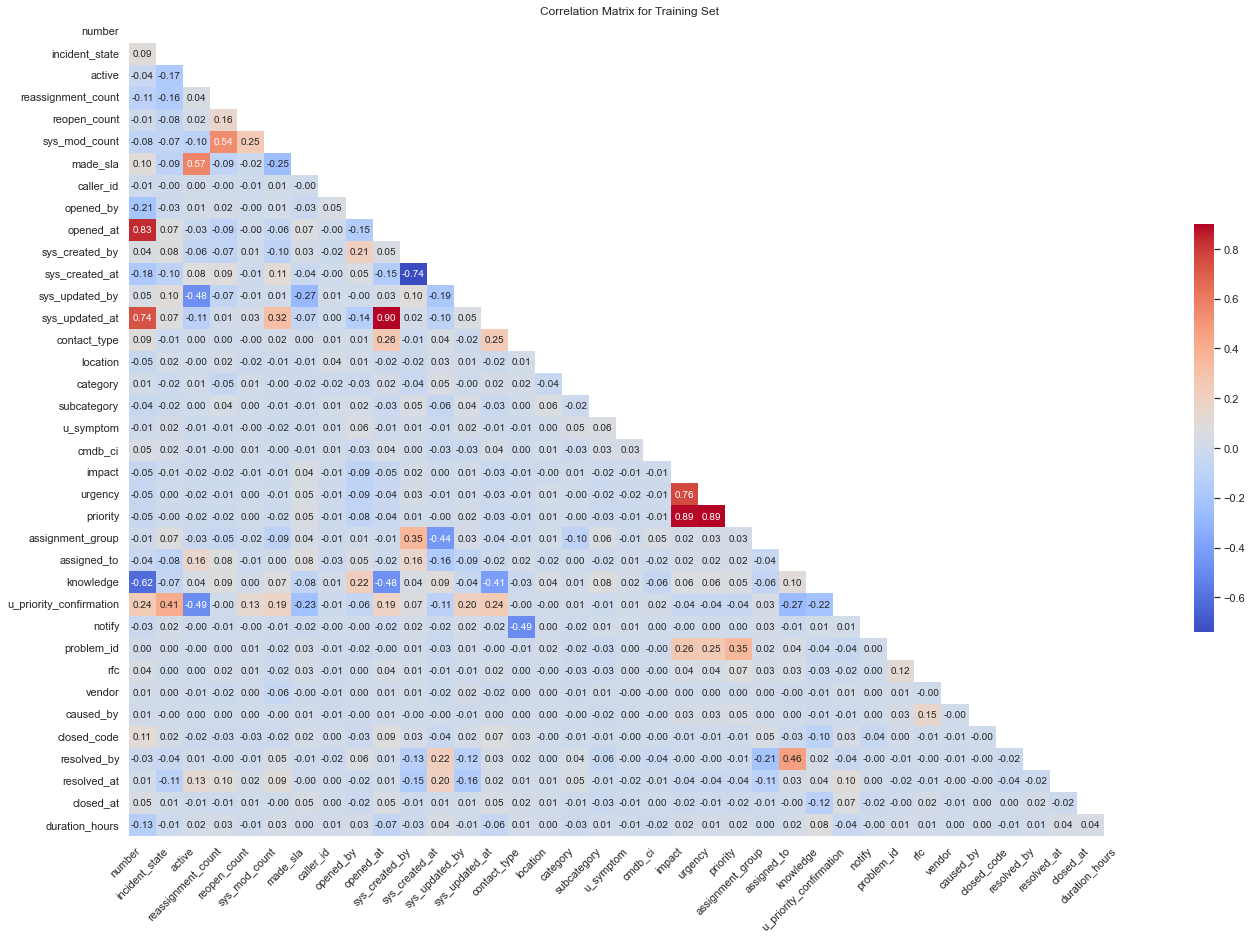

In [18]:
# Correlation analysis with a larger figure size and mask for upper triangle
correlation_matrix = train_df.corr()
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'shrink': .5})
plt.title('Correlation Matrix for Training Set')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [19]:
# Feature selection based on correlation
threshold = 0.1
selected_features = correlation_matrix.columns[abs(correlation_matrix['duration_hours']) > threshold].tolist()

In [20]:
# Apply the selected features to train, validation, and test sets
train_selected = train_df[selected_features]
val_selected = val_df[selected_features]
test_selected = test_df[selected_features]

In [21]:
# Outputting the results
print("Selected Features:", selected_features)
print("\nTraining Set Sample:")
print(train_selected.head())
print("\nValidation Set Sample:")
print(val_selected.head())
print("\nTest Set Sample:")
print(test_selected.head())

Selected Features: ['number', 'duration_hours']

Training Set Sample:
        number  duration_hours
68839    10953       -1.969976
85473    14052        0.123735
101031   17134       -0.037861
132905   23282       -0.037861
38454     5528       -0.037861

Validation Set Sample:
        number  duration_hours
114753   19740       -0.037861
135196   23711       -0.037861
136135   23912       -1.374780
36626     5230       -0.037861
27483     3841       -0.037861

Test Set Sample:
       number  duration_hours
77220   12497       -0.037861
62317    9769        1.257693
66966   10625        1.693270
45586    6714       -0.037861
62838    9884        2.178924


## Task 3: Data Modelling (12%)

In [30]:
# Convert datetime columns to Unix timestamps
datetime_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']  # Modify as needed
for col in datetime_columns:
    incident_data[col] = pd.to_datetime(incident_data[col], errors='coerce')
    incident_data[col] = incident_data[col].astype(np.int64) // 10**9  # Convert to Unix timestamp

In [31]:
# Assuming incident_data is your DataFrame and 'target_column' is your target
X = incident_data.drop('active', axis=1)
y = incident_data['active']

In [32]:
# Splitting the data into training, validation, and test sets
# First, split the data into a training set (60%) and a test set (20% of the total)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the training set further to create a validation set (20% of the total)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Displaying the shapes of the splits
display(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(85026, 36)

(28343, 36)

(28343, 36)

(85026,)

(28343,)

(28343,)

In [28]:
# Function to train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))
    return model

# Logistic Regression
print("Logistic Regression:")
lr_model = train_and_evaluate(LogisticRegression(), X_train, y_train, X_val, y_val)

# Logistic Regression with Hyperparameter Tuning
print("Logistic Regression with Hyperparameter Tuning:")
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
lr_grid_model = train_and_evaluate(lr_grid, X_train, y_train, X_val, y_val)

# Oversampling and LR with Hyperparameter Tuning
print("Oversampling and Logistic Regression with Hyperparameter Tuning:")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
lr_grid_smote = train_and_evaluate(lr_grid, X_train_smote, y_train_smote, X_val, y_val)

Logistic Regression:
              precision    recall  f1-score   support

       False       0.60      0.56      0.58      4953
        True       0.91      0.92      0.91     23390

    accuracy                           0.86     28343
   macro avg       0.75      0.74      0.75     28343
weighted avg       0.85      0.86      0.86     28343

Logistic Regression with Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.60      0.56      0.58      4953
        True       0.91      0.92      0.91     23390

    accuracy                           0.86     28343
   macro avg       0.75      0.74      0.75     28343
weighted avg       0.85      0.86      0.86     28343

Oversampling and Logistic Regression with Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.53      0.96      0.68      4953
        True       0.99      0.82      0.90     23390

    accuracy                           0.84     